# EDA + Data Aggregation (Housing Data)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#from pandas_profiling import ProfileReport

## Data aggregations 
#### Merged set w unemployment rates + Freddie Mac interest rates

In [6]:
file_path = '../datasets/merged/us_cities_homes_sold_below_listing_and_price_cuts_rdc_data_w_macroecon.csv'
df = pd.read_csv(file_path)

/Users/blake/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (37,38) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [9]:
file_path_cs_npi = '../data_staging/inflation_file_series/Case-Schiller_US_National_Price_Index_CSUSHPINSA.csv'
cs_npi = pd.read_csv(file_path_cs_npi) #case shiller national price index by month
file_path_cpi = '../data_staging/inflation_file_series/Consumer_Price_Index_All_Items_CPIAUCSL.csv'
cpi = pd.read_csv(file_path_cpi) #consumer price index
file_path_ffr = '../data_staging/inflation_file_series/Effective_Federal_Funds_Rate_FEDFUNDS.csv'
ffr = pd.read_csv(file_path_ffr) #federal funds rate
file_path_ms = '../data_staging/inflation_file_series/FED_M3_Money_Supply_MABMM301USM189S.csv'
ms = pd.read_csv(file_path_ms) #federal money supply
file_path_ir = '../data_staging/inflation_file_series/Inflation_Rate_CPIAUCSL.csv'
ir = pd.read_csv(file_path_ir) #inflation rate

In [109]:
df.head()

,Date,county_fips,county_name,median_listing_price,median_listing_price_mm,median_listing_price_yy,active_listing_count,active_listing_count_mm,active_listing_count_yy,median_days_on_market,...,city_name,state_id,state_name,lat,lng,density,incorporated,timezone,ranking,id
0,2022-08,45001,"abbeville, sc",199000.0,-0.1152,-0.3671,32.0,0.0323,-0.0857,67.0,...,Abbeville,SC,South Carolina,34.1787,-82.3774,311.0,True,America/New_York,3.0,1.840014e+09
1,2022-07,45001,"abbeville, sc",224900.0,0.1251,-0.1172,31.0,0.0333,0.0000,42.0,...,Abbeville,SC,South Carolina,34.1787,-82.3774,311.0,True,America/New_York,3.0,1.840014e+09
2,2022-06,45001,"abbeville, sc",199900.0,0.0060,-0.2858,30.0,0.1111,0.0714,37.0,...,Abbeville,SC,South Carolina,34.1787,-82.3774,311.0,True,America/New_York,3.0,1.840014e+09
3,2022-05,45001,"abbeville, sc",198700.0,-0.0303,-0.4321,27.0,0.5882,1.0769,32.0,...,Abbeville,SC,South Carolina,34.1787,-82.3774,311.0,True,America/New_York,3.0,1.840014e+09
4,2022-04,45001,"abbeville, sc",204900.0,-0.0002,-0.0196,17.0,-0.1053,0.0000,33.0,...,Abbeville,SC,South Carolina,34.1787,-82.3774,311.0,True,America/New_York,3.0,1.840014e+09


In [115]:
df.shape

(254295, 62)

In [116]:
df.columns

Index(['Date', 'county_fips', 'county_name', 'median_listing_price',
       'median_listing_price_mm', 'median_listing_price_yy',
       'active_listing_count', 'active_listing_count_mm',
       'active_listing_count_yy', 'median_days_on_market',
       'median_days_on_market_mm', 'median_days_on_market_yy',
       'new_listing_count', 'new_listing_count_mm', 'new_listing_count_yy',
       'price_increased_count', 'price_increased_count_mm',
       'price_increased_count_yy', 'price_reduced_count',
       'price_reduced_count_mm', 'price_reduced_count_yy',
       'pending_listing_count', 'pending_listing_count_mm',
       'pending_listing_count_yy', 'median_listing_price_per_square_foot',
       'median_listing_price_per_square_foot_mm',
       'median_listing_price_per_square_foot_yy', 'median_square_feet',
       'median_square_feet_mm', 'median_square_feet_yy',
       'average_listing_price', 'average_listing_price_mm',
       'average_listing_price_yy', 'total_listing_count',
     

In [98]:
cs_npi.head()

,Unnamed: 0,realtime_start,realtime_end,date,value
0,0,2022-09-13,2022-09-13,1975-01-01,.
1,1,2022-09-13,2022-09-13,1975-02-01,.
2,2,2022-09-13,2022-09-13,1975-03-01,.
3,3,2022-09-13,2022-09-13,1975-04-01,.
4,4,2022-09-13,2022-09-13,1975-05-01,.


In [99]:
cpi.head()

,Unnamed: 0,realtime_start,realtime_end,date,value
0,0,2022-09-13,2022-09-13,1947-01-01,21.48
1,1,2022-09-13,2022-09-13,1947-02-01,21.62
2,2,2022-09-13,2022-09-13,1947-03-01,22.00
3,3,2022-09-13,2022-09-13,1947-04-01,22.00
4,4,2022-09-13,2022-09-13,1947-05-01,21.95


In [100]:
ffr.head()

,Unnamed: 0,realtime_start,realtime_end,date,value
0,0,2022-09-13,2022-09-13,1954-07-01,0.80
1,1,2022-09-13,2022-09-13,1954-08-01,1.22
2,2,2022-09-13,2022-09-13,1954-09-01,1.07
3,3,2022-09-13,2022-09-13,1954-10-01,0.85
4,4,2022-09-13,2022-09-13,1954-11-01,0.83


In [101]:
ms.head()

,Unnamed: 0,realtime_start,realtime_end,date,value
0,0,2022-09-13,2022-09-13,1959-01-01,.
1,1,2022-09-13,2022-09-13,1959-02-01,.
2,2,2022-09-13,2022-09-13,1959-03-01,.
3,3,2022-09-13,2022-09-13,1959-04-01,.
4,4,2022-09-13,2022-09-13,1959-05-01,.


In [102]:
ir.head()

,Unnamed: 0,realtime_start,realtime_end,date,value
0,0,2022-09-13,2022-09-13,1947-01-01,21.48
1,1,2022-09-13,2022-09-13,1947-02-01,21.62
2,2,2022-09-13,2022-09-13,1947-03-01,22.00
3,3,2022-09-13,2022-09-13,1947-04-01,22.00
4,4,2022-09-13,2022-09-13,1947-05-01,21.95


In [103]:
h = cs_npi.loc[cs_npi.date == '2022-05-01', 'value']
h.values[0]

'306.375'

In [10]:
cs_npi_ls = []
cpi_ls = []
ffr_ls = []
ms_ls = []
ir_ls = []
for i, v in enumerate(df.Date):
    vs = str(v)
    yr = vs[:4]
    mn = vs[4:]
    comb = str(yr) + str(mn) + '-01'
    #find the proper value or save value as "none" it it doesn't exist
    try :
        cs_npi_s = cs_npi.loc[cs_npi.date == comb, 'value']
        cs_npi_val = cs_npi_s.values[0]
    except:
        cs_npi_val = 'none'
    try: 
        cpi_s = cpi.loc[cpi.date == comb, 'value']
        cpi_val = cpi_s.values[0]
    except:
        cpi_val = 'none'
    try:
        ffr_s = ffr.loc[ffr.date == comb, 'value']
        ffr_val = ffr_s.values[0]
    except: 
        ffr_val = 'none'
    try:
        ms_s = ms.loc[ms.date == comb, 'value']
        ms_val = ms_s.values[0]
    except: 
        ms_val = 'none'
    try:
        ir_s = ir.loc[ir.date == comb, 'value']
        ir_val = ir_s.values[0]
    except: 
        ir_val = 'none'
    cs_npi_ls.append(cs_npi_val)
    cpi_ls.append(cpi_val)
    ffr_ls.append(ffr_val)
    ms_ls.append(ms_val)
    ir_ls.append(ir_val)

df['case_schiller_national_price_index'] = cs_npi_ls
df['consumer_price_index'] = cpi_ls
df['federal_fund_rate'] = ffr_ls
df['federal_money_supply'] = ms_ls
df['inflation_rate'] = ir_ls

In [8]:
# check the count of none values
print('state name')
print(df['state_name'].isna().sum())
print((df.shape[0]-df['state_name'].isna().sum())/df.shape[0])
print((df.shape[0]-df['state_name'].isna().sum()))
# print('homeowner_vacancy_rate')
# print(sum(df['homeowner_vacancy_rate'] == 'none'))
# print((df.shape[0]-sum(df['homeowner_vacancy_rate'] == 'none'))/df.shape[0])

state name
159456
0.37294874063587563
94839


## EDA
#### EDA and correlation analysis between key values

In [11]:
# check the count of none values of interest rates
print('case schiller national price index')
print(sum(df['case_schiller_national_price_index'] == 'none'))
print((df.shape[0]-sum(df['case_schiller_national_price_index'] == 'none'))/df.shape[0])

print('consumer price index')
print(sum(df['consumer_price_index'] == 'none'))
print((df.shape[0]-sum(df['consumer_price_index'] == 'none'))/df.shape[0])

print('federal fund rate')
print(sum(df['federal_fund_rate'] == 'none'))
print((df.shape[0]-sum(df['federal_fund_rate'] == 'none'))/df.shape[0])

print('federal money supply')
print(sum(df['federal_money_supply'] == 'none'))
print((df.shape[0]-sum(df['federal_money_supply'] == 'none'))/df.shape[0])

print('inflation rate')
print(sum(df['inflation_rate'] == 'none'))
print((df.shape[0]-sum(df['inflation_rate'] == 'none'))/df.shape[0])

case schiller national price index
6440
0.974675082089699
consumer price index
3106
0.9877858392811498
federal fund rate
0
1.0
federal money supply
6440
0.974675082089699
inflation rate
3106
0.9877858392811498


In [12]:
df.dtypes

Date                                   object
county_fips                             int64
county_name                            object
median_listing_price                  float64
median_listing_price_mm               float64
                                       ...   
case_schiller_national_price_index     object
consumer_price_index                   object
federal_fund_rate                     float64
federal_money_supply                   object
inflation_rate                         object
Length: 67, dtype: object

In [61]:
cs_npi['date'] = pd.to_datetime(cs_npi['date'], format='%Y/%m/%d')
cs_npi_s = cs_npi.sort_values(['date'])

cpi['date'] = pd.to_datetime(cpi['date'], format='%Y/%m/%d')
cpi_s = cpi.sort_values(['date'])

ffr['date'] = pd.to_datetime(ffr['date'], format='%Y/%m/%d')
ffr_s = ffr.sort_values(['date'])

ms['date'] = pd.to_datetime(ms['date'], format='%Y/%m/%d')
ms_s = ms.sort_values(['date'])

ir['date'] = pd.to_datetime(ir['date'], format='%Y/%m/%d')
ir_s = ir.sort_values(['date'])

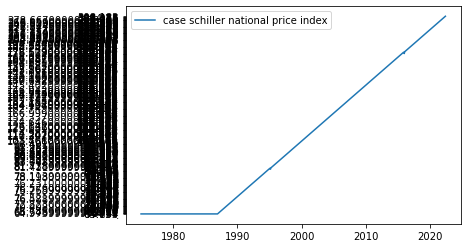

In [63]:
# let's take a look at the 5 new attributes to start
plt.plot(cs_npi.date, cs_npi['value'], label = "case schiller national price index")
plt.legend()
plt.show()

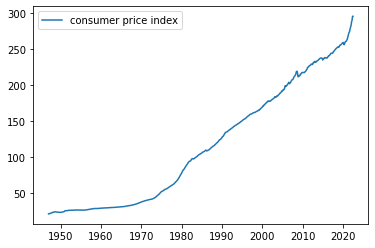

In [64]:
plt.plot(cpi.date, cpi['value'], label = "consumer price index")
plt.legend()
plt.show()

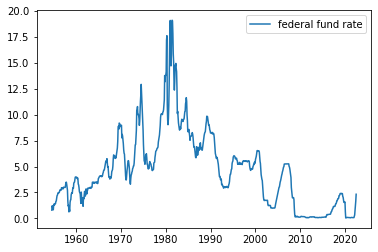

In [65]:
plt.plot(ffr.date, ffr['value'], label = "federal fund rate")
plt.legend()
plt.show()

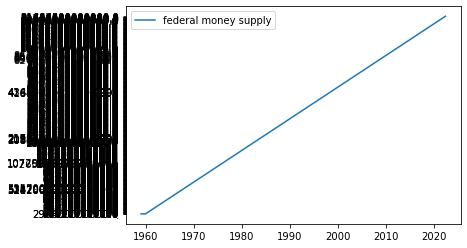

In [66]:
plt.plot(ms.date, ms['value'], label = "federal money supply")
plt.legend()
plt.show()

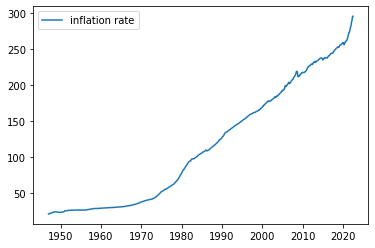

In [67]:
plt.plot(ir.date, ir['value'], label = "inflation rate")
plt.legend()
plt.show()

# Add Home vacancy rates and homeownership rates data

In [13]:
file_path_hor = '../datasets/census/homeownership_rates_state_2005.csv'
hor = pd.read_csv(file_path_hor) #homeownership rates by state since 2005
file_path_vr = '../datasets/census/homeowner_vacancy_rates_state_2005.csv'
vr = pd.read_csv(file_path_vr) #homeowner vacancy rates by state since 2005

In [17]:
hor.head()

,State,2022Q1,2022Q2,2021Q1,2021Q2,2021Q3,2021Q4,2020Q1,2020Q2,2020Q3,...,2007Q3,2007Q4,2006Q1,2006Q2,2006Q3,2006Q4,2005Q1,2005Q2,2005Q3,2005Q4
0,Alabama,71.5,71.3,72.5,72.3,73.3,75.3,73.5,76.9,74.8,...,75.0,72.6,73.9,74.8,75.7,72.4,77.1,76.1,76.8,76.3
1,Alaska,61.8,65.5,63.9,63.4,64.1,64.4,63.8,67.0,63.8,...,67.0,67.9,67.0,68.4,66.8,66.6,64.8,65.6,67.0,66.6
2,Arizona,66.4,67.2,64.5,65.8,64.1,66.5,64.0,71.7,71.0,...,69.8,68.5,69.1,72.8,73.2,71.2,74.1,69.5,70.8,70.2
3,Arkansas,66.5,64.5,63.7,66.1,66.9,67.5,66.6,71.3,70.7,...,71.5,68.7,70.5,70.7,70.6,71.5,70.1,68.4,67.4,70.7
4,California,54.2,54.6,54.4,53.9,54.4,54.3,54.4,56.4,57.2,...,58.5,57.7,59.8,60.1,60.7,60.0,59.9,59.0,59.8,60.1


In [77]:
vr.head()

,State,2022Q1,2022Q2,2021Q1,2021Q2,2021Q3,2021Q4,2020Q1,2020Q2,2020Q3,...,Unnamed: 131,Unnamed: 132,Unnamed: 133,Unnamed: 134,Unnamed: 135,Unnamed: 136,Unnamed: 137,Unnamed: 138,Unnamed: 139,Unnamed: 140
0,Alabama,0.7,0.8,1.2,1.3,0.7,0.8,2.1,0.7,0.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Alaska,1.3,1.0,0.8,0.7,1.3,1.8,1.4,2.6,2.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arizona,0.6,0.9,0.6,1.0,0.7,0.7,1.0,1.0,0.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arkansas,0.8,1.2,1.5,0.8,1.2,1.1,1.7,1.5,1.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,California,0.5,0.8,0.9,0.8,0.6,0.7,0.8,0.7,0.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
vr = vr.iloc[:,:71] #clean the table

In [80]:
vr.head()

,State,2022Q1,2022Q2,2021Q1,2021Q2,2021Q3,2021Q4,2020Q1,2020Q2,2020Q3,...,2007Q3,2007Q4,2006Q1,2006Q2,2006Q3,2006Q4,2005Q1,2005Q2,2005Q3,2005Q4
0,Alabama,0.7,0.8,1.2,1.3,0.7,0.8,2.1,0.7,0.7,...,2.4,2.3,2.2,2.3,3.7,2.8,2.4,1.8,2.1,1.9
1,Alaska,1.3,1.0,0.8,0.7,1.3,1.8,1.4,2.6,2.5,...,3.0,1.9,1.9,1.2,2.1,1.7,0.9,1.6,1.4,2.1
2,Arizona,0.6,0.9,0.6,1.0,0.7,0.7,1.0,1.0,0.6,...,4.2,4.6,3.1,3.2,2.3,3.4,1.0,1.6,1.2,0.8
3,Arkansas,0.8,1.2,1.5,0.8,1.2,1.1,1.7,1.5,1.4,...,1.8,1.7,1.7,1.3,1.3,3.2,2.1,2.7,2.0,2.4
4,California,0.5,0.8,0.9,0.8,0.6,0.7,0.8,0.7,0.8,...,2.3,2.3,1.3,1.9,2.3,2.2,0.7,1.0,1.5,1.7


In [20]:
# hor_s = hor.loc[hor.State == df.state_name[0], '2022Q1']
# hor_val = hor_s.values[0]
# print(hor_val)

In [21]:
hor_ls = []
vr_ls = []
for i, v in enumerate(df.Date):
    vs = str(v)
    yr = vs[:4]
    mn = vs[4:]
    mnn = float(mn[1:3])
    qrt = int((mnn-1)//3 + 1)
    comb = str(yr) + 'Q' + str(qrt) # get proper YYYY:Q# value for GDP dataset
    #find the proper value or save value as "none" it it doesn't exist
    try :
        hor_s = hor.loc[hor.State == df.state_name[i], comb]
        hor_val = hor_s.values[0]
    except:
        hor_val = 'none'
    try: 
        vr_s = vr.loc[vr.State == df.state_name[i], comb]
        vr_val = vr_s.values[0]
    except:
        vr_val = 'none'
    
    hor_ls.append(hor_val)
    vr_ls.append(vr_val)

df['homeownership_rate'] = hor_ls
df['homeowner_vacancy_rate'] = vr_ls

In [22]:
# check the count of none values
print('homeownership rate')
print(sum(df['homeownership_rate'] == 'none'))
print((df.shape[0]-sum(df['homeownership_rate'] == 'none'))/df.shape[0])

print('homeowner_vacancy_rate')
print(sum(df['homeowner_vacancy_rate'] == 'none'))
print((df.shape[0]-sum(df['homeowner_vacancy_rate'] == 'none'))/df.shape[0])

homeownership rate
161578
0.36460410153561806
homeowner_vacancy_rate
161578
0.36460410153561806


In [24]:
# now lets export our aggregated dataset to a csv
to_csv_path = '../datasets/merged/main_data_v5.csv'
df.to_csv(to_csv_path)